<a href="https://colab.research.google.com/github/zfennie/Python-Scripting-for-SQL-Database/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fennie's Pandas Descriptive Statistics Report
## Python script reads a dataset, generates descriptive statistics, and a visualization using Pandas
### FiveThirtyEight's MMS ICU Beds Dataset
This dataset combines data from the Centers for Disease Control and Prevention's Behavioral Risk Factor Surveillance System (BRFSS) and the Kaiser Family Foundation to illustrate the number of people who were at high risk for hospitalization from the novel coronavirus COVID-19 in 2020.\
URL: https://github.com/fivethirtyeight/data/blob/e6bbbb2d35310b5c63c2995a0d03d582d0c7b2e6/covid-geography/mmsa-icu-beds.csv


First, we will begin by reading in and examining a preview of our dataset. Previewing the data set ensures it was properly imported and stored.

In [4]:
# load required packages
import pandas as pd
import matplotlib.pyplot as plt

# create a local variable and import our data
data = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/covid-geography/mmsa-icu-beds.csv"
)

# preview a random sample of the data to test for a successful upload
data.sample(n=10)

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
5,"Baton Rouge, LA",66.60%,3459.732500,39000.62091,124.0,11.0,429006.83
119,"Birmingham-Hoover, AL",66.48%,1109.572514,42243.01071,533.0,14.0,591402.15
87,"Oklahoma City, OK",62.22%,1661.773680,25182.26269,394.0,26.0,654738.83
12,"Portland-South Portland, ME",60.60%,3051.228953,43734.28167,86.0,6.0,262405.69
118,"Toledo, OH",64.20%,1123.504366,33455.46333,268.0,9.0,301099.17
75,"Pensacola-Ferry Pass-Brent, FL",62.98%,1810.896176,41046.98000,136.0,6.0,246281.88
103,"Louisville/Jefferson County, KY-IN",63.04%,1480.792787,52691.54333,427.0,12.0,632298.52
86,"Nassau County-Suffolk County, NY, Metropolitan...",54.88%,1664.477480,61752.11450,742.0,20.0,1235042.29
29,"Oakland-Hayward-Berkeley, CA, Metropolitan Div...",48.01%,2385.409101,55868.79211,445.0,19.0,1061507.05
99,"Chicago-Naperville-Elgin, IL-IN-WI",56.02%,1548.761447,45614.71214,2474.0,84.0,3831635.82


Great! However, it appears we do have fields marked as 'NaN'. 'NaN', an abbreaviation for 'Not a Number', is essentially a placeholder for a missing value. Luckily, the describe() Pandas method automatically filters out 'NaN' values.

In [5]:
# display summary statistics
data.describe()

,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
count,135.000000,135.000000,135.000000,135.000000,1.360000e+02
mean,1947.356729,43787.067561,360.185185,13.762963,6.671887e+05
std,720.661896,17992.274197,450.580508,15.377929,8.847868e+05
min,413.667706,6770.190000,8.000000,1.000000,1.794153e+04
25%,1487.781317,31005.455625,89.500000,5.000000,1.587478e+05
50%,1923.676063,42460.360000,221.000000,9.000000,3.960815e+05
75%,2321.085003,56583.347585,489.500000,18.000000,9.327925e+05
max,4489.848750,91771.345830,2777.000000,100.000000,6.165102e+06


Excellent! The focus of this specific dataset was on comparing the population of high risk for hospitalization and the capacity that a county had to provide care with respect to the number of hospitals & ICU beds it had. Since this is only an introduction to our data, lets perform a quick boxplot on the columns of most interest: 'High Risk per ICU Bed' and 'High Risk per Hospital'.

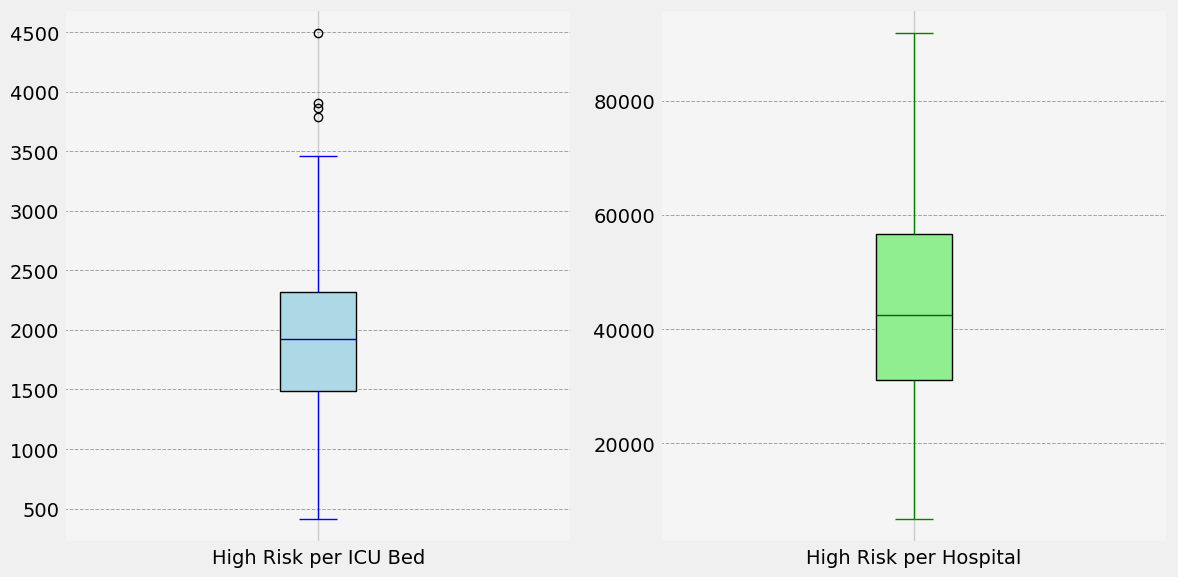

In [12]:
# slicing columns & dropping NaN values
plot_slice = data.iloc[:, 2].dropna()
plot_slice2 = data.iloc[:, 3].dropna()

# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# box plot for the ICU
axes[0].boxplot(
    plot_slice.values,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    medianprops=dict(color="darkblue"),
)
axes[0].set_xticklabels(["High Risk per ICU Bed"])

# box plot for the Hospital
axes[1].boxplot(
    plot_slice2.values,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen"),
    whiskerprops=dict(color="green"),
    capprops=dict(color="green"),
    medianprops=dict(color="darkgreen"),
)
axes[1].set_xticklabels(["High Risk per Hospital"])

# custom grid
for ax in axes:
    ax.grid(axis="y", color="gray", linestyle="--", linewidth=0.7, alpha=0.7)
    ax.set_facecolor("whitesmoke")  # Set the background color

# adjust layout
plt.tight_layout()

# display plots
plt.show()

The boxplots illustrate the range of possiblities that hospitals would come to face during the pandemic. Tight boxplots would demonstrate a robust healthcare system capable of meeting the demands of the pandemic. However, as we can see here and as we witnessed in 2020, communities across the nation had different experiences of the infection as some had the ICU and hospital capcity to absorb the infection while others did not.

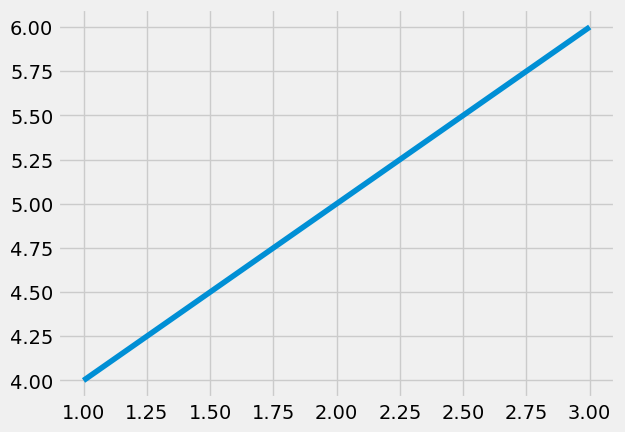

In [10]:
plt.style.use('fivethirtyeight')
plt.plot([1, 2, 3], [4, 5, 6])  # Simple line plot
plt.show()
